## Exercises:
* ##### E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?
* ##### E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?
* ##### E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?
* ##### E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?
* ##### E05: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?
* ##### E06: meta-exercise! Think of a fun/interesting exercise and complete it.

In [1]:
import torch

torch.cuda.is_available()

True

In [2]:
torch.cuda.device_count()

1

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(Out[3])

'AMD Radeon RX 6900 XT'

In [5]:
torch.set_default_device(Out[3])

### E01

In [6]:
# words = ['..'+line.split(',')[1].lower()+'.' for line in open("data/NationalNames.csv", 'r').read().splitlines()][1:]
words = [line.split(',')[1].lower() for line in open("data/NationalNames.csv", 'r').read().splitlines()][1:][:20000]
len(words)

20000

In [7]:
from GramModels import GramModel

trigram_counting_model = GramModel(method="counts", n_grams=3)
trigram_nn_model = GramModel(method="nn", n_grams=3)

In [8]:
trigram_counting_model.itos_in

In [9]:
trigram_counting_model.fit(words, smooth_factor=1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 134012 Generated


Counting grams..: 134012it [00:03, 39547.90it/s]
Calculating loss..: 100%|██████████| 134012/134012 [00:04<00:00, 29510.14it/s]


Finised with loss: 1.9684960842132568


In [10]:
trigram_nn_model.fit(words, epochs=1000, lr=40, smooth_factor=0.1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 134012 Generated
Epoch 1: loss	3.782377243041992
Epoch 2: loss	3.522132635116577
Epoch 3: loss	3.4108145236968994
Epoch 4: loss	3.340153217315674
Epoch 5: loss	3.285499334335327
Epoch 6: loss	3.238935947418213
Epoch 7: loss	3.1975045204162598
Epoch 8: loss	3.1600561141967773
Epoch 9: loss	3.126084566116333
Epoch 10: loss	3.0952565670013428
Epoch 11: loss	3.067244529724121
Epoch 12: loss	3.0416901111602783
Epoch 13: loss	3.018233299255371
Epoch 14: loss	2.996551752090454
Epoch 15: loss	2.976377487182617
Epoch 16: loss	2.9575018882751465
Epoch 17: loss	2.9397644996643066
Epoch 18: loss	2.923042058944702
Epoch 19: loss	2.9072377681732178
Epoch 20: loss	2.892273187637329
Epoch 21: loss	2.878084897994995
Epoch 22: loss	2.864617109298706
Epoch 23: loss	2.851820945739746
Epoch 24: loss	2.839653491973877
Epoch 25: loss	2.8280742168426514
Epoch 26: loss	2.8170478343963623
Epoch 27: l

In [11]:
trigram_counting_model.generateWords(20)

Generating Words..: 100%|██████████| 20/20 [00:00<00:00, 45.69it/s]


['..irymqzvtlrywcbjetta.',
 '..jake.',
 '..mah.',
 '..st.',
 '..katt.',
 '..ma.',
 '..wara.',
 '..lemer.',
 '..fton.',
 '..sylhelgkkmfertalvlymona.',
 '..joaymita.',
 '..ron.',
 '..ma.',
 '..ksbgcpvhsdxxlthelizambvubros.',
 '..pe.',
 '..gusta.',
 '..hyrth.',
 '..lon.',
 '..son.',
 '..tia.']

In [12]:
trigram_nn_model.generateWords(20)

Generating Words..: 100%|██████████| 20/20 [00:00<00:00, 230.66it/s]


['..g.',
 '..frre.',
 '..tkrznflxnxhmlb.',
 '..f.',
 '..b.',
 '..n.',
 '..rrdkjbcr.',
 '..rrknlkqmmalewstioryewffyhhtavis.',
 '..n.',
 '..ete.',
 '..tiuchmmiel.',
 '..ceoubvtmhklrteoraejafel.',
 '..imciwo.',
 '..imcpufecg.',
 '..anumtmdxgxmpf.',
 '..l.',
 '..cel.',
 '..riimsaejeexaxscuqumzmnhyhwmlhgteoydj.',
 '..lryoqbtjttdsqgel.',
 '..roiphbtste.']

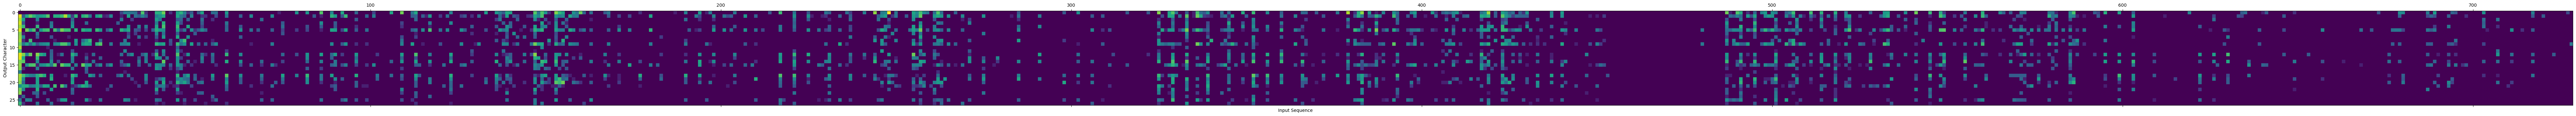

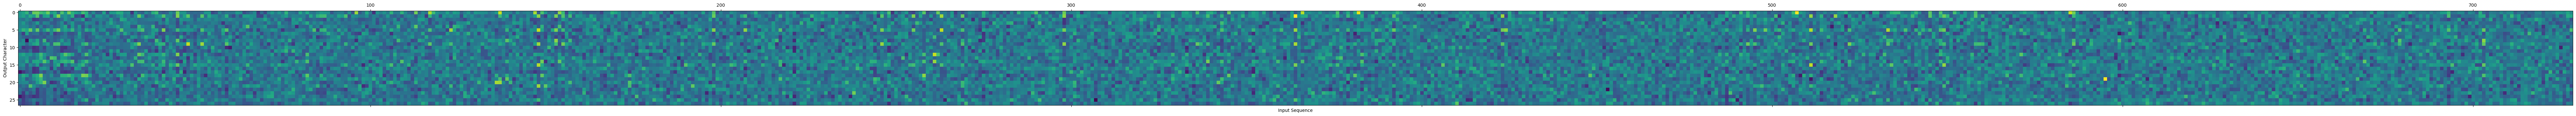

In [13]:
# plot matrix 
def plot_matrix(matrix):
    import matplotlib.pyplot as plt

    plt.figure(figsize=((27 ** 2) / 7, (27) / 7))  # Increased figure size
    plt.matshow(matrix.T, aspect='equal', fignum=0)
    plt.xlabel('Input Sequence')
    plt.ylabel('Output Character')

    plt.show()


plot_matrix(trigram_counting_model.W.cpu().data)
plot_matrix(trigram_nn_model.W.cpu().data)

In [14]:
print((c_m := trigram_counting_model.W.cpu().data).max(), c_m.min(), c_m.mean())
print((nn_m := trigram_nn_model.W.cpu().data).max(), nn_m.min(), nn_m.mean())

tensor(7.8785) tensor(0.) tensor(0.3964)
tensor(6.0461) tensor(-4.1421) tensor(0.0008)


In [15]:
del trigram_counting_model
del trigram_nn_model

In [16]:

import gc

gc.collect()

3239

## E02

In [17]:
# Shuffle words
import random

random.shuffle(words)
# Split words into 80 10 10
n = len(words)
train_words, val_words, test_words = words[:int(0.8 * n)], words[int(0.8 * n):int(0.9 * n)], words[int(0.9 * n):]

In [18]:
bigram_nn = GramModel(method="nn", n_grams=2)
trigram_nn = GramModel(method="nn", n_grams=3)

In [19]:
bigram_nn.fit(train_words, epochs=1000, lr=40, smooth_factor=1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 107038 Generated
Epoch 1: loss	3.8508872985839844
Epoch 2: loss	3.320519208908081
Epoch 3: loss	3.0769660472869873
Epoch 4: loss	2.948701858520508
Epoch 5: loss	2.864570140838623
Epoch 6: loss	2.8058218955993652
Epoch 7: loss	2.7627041339874268
Epoch 8: loss	2.7298996448516846
Epoch 9: loss	2.7043378353118896
Epoch 10: loss	2.68406081199646
Epoch 11: loss	2.6677069664001465
Epoch 12: loss	2.6542975902557373
Epoch 13: loss	2.6431257724761963
Epoch 14: loss	2.6336848735809326
Epoch 15: loss	2.6256067752838135
Epoch 16: loss	2.6186227798461914
Epoch 17: loss	2.61253023147583
Epoch 18: loss	2.6071746349334717
Epoch 19: loss	2.602436065673828
Epoch 20: loss	2.598219871520996
Epoch 21: loss	2.5944504737854004
Epoch 22: loss	2.591064453125
Epoch 23: loss	2.5880117416381836
Epoch 24: loss	2.58524751663208
Epoch 25: loss	2.582735300064087
Epoch 26: loss	2.5804443359375
Epoch 27: loss

In [20]:
trigram_nn.fit(train_words, epochs=1000, lr=40, smooth_factor=1)

Generating alphabet
alphabet Generated
Generating mappings
Mappings generated
Generatng n-grams
NGrams of length 107038 Generated
Epoch 1: loss	3.711897850036621
Epoch 2: loss	3.519853353500366
Epoch 3: loss	3.4242281913757324
Epoch 4: loss	3.361863374710083
Epoch 5: loss	3.310995101928711
Epoch 6: loss	3.266300678253174
Epoch 7: loss	3.225961446762085
Epoch 8: loss	3.1890616416931152
Epoch 9: loss	3.1550371646881104
Epoch 10: loss	3.1235015392303467
Epoch 11: loss	3.0941693782806396
Epoch 12: loss	3.0668208599090576
Epoch 13: loss	3.041273355484009
Epoch 14: loss	3.0173685550689697
Epoch 15: loss	2.9949615001678467
Epoch 16: loss	2.97391939163208
Epoch 17: loss	2.954119920730591
Epoch 18: loss	2.935451030731201
Epoch 19: loss	2.9178154468536377
Epoch 20: loss	2.901124954223633
Epoch 21: loss	2.885305404663086
Epoch 22: loss	2.8702898025512695
Epoch 23: loss	2.8560221195220947
Epoch 24: loss	2.842451810836792
Epoch 25: loss	2.8295328617095947
Epoch 26: loss	2.817225933074951
Epoch 27: 

In [21]:
bigram_loss_val = bigram_nn.evaluate(val_words).item()
bigram_loss_test = bigram_nn.evaluate(test_words).item()
trigram_loss_val = trigram_nn.evaluate(val_words).item()
trigram_loss_test = trigram_nn.evaluate(test_words).item()
print(f"{bigram_loss_val=:.4f}\t{bigram_loss_test=:.4f}")
print(f"{trigram_loss_val=:.4f}\t{trigram_loss_test=:.4f}")

Generatng n-grams
NGrams of length 13415 Generated
Generatng n-grams
NGrams of length 13559 Generated
Generatng n-grams
NGrams of length 13415 Generated
Generatng n-grams
NGrams of length 13559 Generated
bigram_loss_val=3.3001	bigram_loss_test=3.2134
trigram_loss_val=3.4282	trigram_loss_test=3.3495


In [22]:
del bigram_nn
del trigram_nn
gc.collect()

0

## E03

In [23]:
import numpy as np

regularization_range = np.linspace(0.1, 10, 30)
regularization_range

array([ 0.1       ,  0.44137931,  0.78275862,  1.12413793,  1.46551724,
        1.80689655,  2.14827586,  2.48965517,  2.83103448,  3.17241379,
        3.5137931 ,  3.85517241,  4.19655172,  4.53793103,  4.87931034,
        5.22068966,  5.56206897,  5.90344828,  6.24482759,  6.5862069 ,
        6.92758621,  7.26896552,  7.61034483,  7.95172414,  8.29310345,
        8.63448276,  8.97586207,  9.31724138,  9.65862069, 10.        ])

In [24]:
import sys, os, tqdm
best_hyperparam = {"beta": 0.0, "loss": float("inf")}
for b in tqdm.tqdm(regularization_range):
    sys.stdout = open(os.devnull, 'w')
    model_candidate = GramModel("nn", n_grams=3)
    model_candidate.fit(train_words, epochs=1000, lr=40, smooth_factor=b, verbose=0)
    curr_loss = model_candidate.evaluate(val_words).item()
    if curr_loss < best_hyperparam["loss"]:
        best_hyperparam["loss"] = curr_loss
        best_hyperparam["beta"] = b
    del model_candidate
    gc.collect()
    sys.stdout = sys.__stdout__
best_hyperparam

100%|██████████| 30/30 [02:07<00:00,  4.25s/it]


{'beta': 9.658620689655173, 'loss': 3.3172333240509033}

In [25]:
best_model = GramModel("nn", n_grams=3)
best_model.fit(train_words, epochs=1000, lr=40, smooth_factor=best_hyperparam["beta"])
trigram_loss_val = best_model.evaluate(val_words).item()
trigram_loss_test = best_model.evaluate(test_words).item()
print(f"{trigram_loss_val=:.4f}\t{trigram_loss_test=:.4f}")

In [26]:
trigram_loss_val

3.341125249862671

In [27]:
trigram_loss_test

3.2152721881866455